In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 #context length: how many characters do we take to predict the next one ?
X, Y = [], []
for word in words[:5]:
    print(word)
    context = [0] * block_size
    # print(context)
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)




emma
... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
olivia
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
ava
... -----> a
..a -----> v
.av -----> a
ava -----> .
isabella
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
sophia
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [8]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [9]:
C = torch.randn((27,2))

In [10]:
C

tensor([[-1.7777,  0.2284],
        [-0.7187,  0.7528],
        [ 1.2238, -0.2060],
        [ 0.0086,  1.2793],
        [ 1.6469,  0.6160],
        [ 1.3400,  1.3408],
        [-0.3267,  1.3123],
        [ 0.3672, -1.7816],
        [ 0.9440,  0.4811],
        [ 0.8865, -0.3450],
        [-0.5632,  0.9667],
        [-2.2769,  1.3938],
        [-0.0241, -0.9125],
        [-0.0799,  0.2138],
        [-0.0850,  1.3672],
        [-0.4108,  0.8197],
        [ 0.6633,  0.5643],
        [-1.1025,  2.3003],
        [-0.7748,  0.4373],
        [-1.5564,  0.3006],
        [-1.0311, -0.3363],
        [-0.0853,  0.0859],
        [ 1.1676,  0.7567],
        [-1.1664, -0.1962],
        [ 1.4909, -0.6268],
        [ 0.2814,  0.1458],
        [ 0.2837, -0.0732]])

In [11]:
F.one_hot(torch.tensor(5),num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([1.3400, 1.3408])

In [13]:
C[5]

tensor([1.3400, 1.3408])

In [14]:
C[X]

tensor([[[-1.7777,  0.2284],
         [-1.7777,  0.2284],
         [-1.7777,  0.2284]],

        [[-1.7777,  0.2284],
         [-1.7777,  0.2284],
         [ 1.3400,  1.3408]],

        [[-1.7777,  0.2284],
         [ 1.3400,  1.3408],
         [-0.0799,  0.2138]],

        [[ 1.3400,  1.3408],
         [-0.0799,  0.2138],
         [-0.0799,  0.2138]],

        [[-0.0799,  0.2138],
         [-0.0799,  0.2138],
         [-0.7187,  0.7528]],

        [[-1.7777,  0.2284],
         [-1.7777,  0.2284],
         [-1.7777,  0.2284]],

        [[-1.7777,  0.2284],
         [-1.7777,  0.2284],
         [-0.4108,  0.8197]],

        [[-1.7777,  0.2284],
         [-0.4108,  0.8197],
         [-0.0241, -0.9125]],

        [[-0.4108,  0.8197],
         [-0.0241, -0.9125],
         [ 0.8865, -0.3450]],

        [[-0.0241, -0.9125],
         [ 0.8865, -0.3450],
         [ 1.1676,  0.7567]],

        [[ 0.8865, -0.3450],
         [ 1.1676,  0.7567],
         [ 0.8865, -0.3450]],

        [[ 1.1676,  0

In [15]:
C[X].shape

torch.Size([32, 3, 2])

In [16]:
X[13][2]

tensor(1)

In [17]:
C[X][13][2]

tensor([-0.7187,  0.7528])

In [18]:
C[1]

tensor([-0.7187,  0.7528])

In [19]:
emb =  C[X]
emb.shape

torch.Size([32, 3, 2])

In [20]:
torch.cat([emb[:,0,:], emb[:, 1, :], emb[:, 2, :]],1).shape

torch.Size([32, 6])

In [21]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)

In [22]:
# instead of concat we can multiply it using view, View tells torch how to view that data instead of concat which creates new tensor

emb.view(32,6)

tensor([[-1.7777,  0.2284, -1.7777,  0.2284, -1.7777,  0.2284],
        [-1.7777,  0.2284, -1.7777,  0.2284,  1.3400,  1.3408],
        [-1.7777,  0.2284,  1.3400,  1.3408, -0.0799,  0.2138],
        [ 1.3400,  1.3408, -0.0799,  0.2138, -0.0799,  0.2138],
        [-0.0799,  0.2138, -0.0799,  0.2138, -0.7187,  0.7528],
        [-1.7777,  0.2284, -1.7777,  0.2284, -1.7777,  0.2284],
        [-1.7777,  0.2284, -1.7777,  0.2284, -0.4108,  0.8197],
        [-1.7777,  0.2284, -0.4108,  0.8197, -0.0241, -0.9125],
        [-0.4108,  0.8197, -0.0241, -0.9125,  0.8865, -0.3450],
        [-0.0241, -0.9125,  0.8865, -0.3450,  1.1676,  0.7567],
        [ 0.8865, -0.3450,  1.1676,  0.7567,  0.8865, -0.3450],
        [ 1.1676,  0.7567,  0.8865, -0.3450, -0.7187,  0.7528],
        [-1.7777,  0.2284, -1.7777,  0.2284, -1.7777,  0.2284],
        [-1.7777,  0.2284, -1.7777,  0.2284, -0.7187,  0.7528],
        [-1.7777,  0.2284, -0.7187,  0.7528,  1.1676,  0.7567],
        [-0.7187,  0.7528,  1.1676,  0.7

In [23]:
h = emb.view(32, 6) @ W1 +b1

In [24]:
h

tensor([[ 2.5951, -1.1190,  3.0891,  ..., -0.1620,  0.7912,  0.8739],
        [-0.3730,  0.0308, -2.9999,  ...,  4.1518, -0.4391,  1.0197],
        [-0.9529,  4.3194,  0.8796,  ...,  2.3945, -0.2408, -2.8276],
        ...,
        [-2.1832,  2.5070,  0.2280,  ...,  2.5740,  0.6337, -2.4364],
        [-2.8159,  2.7937,  0.6299,  ...,  0.7903,  1.9213, -2.1427],
        [-0.2793,  0.0960,  3.6400,  ..., -1.3003,  0.5197, -2.2729]])

In [25]:
# h = emb.view(emb.shape[0], 6) @ W1 +b1
h = emb.view(-1, 6) @ W1 + b1

In [26]:
h

tensor([[ 2.5951, -1.1190,  3.0891,  ..., -0.1620,  0.7912,  0.8739],
        [-0.3730,  0.0308, -2.9999,  ...,  4.1518, -0.4391,  1.0197],
        [-0.9529,  4.3194,  0.8796,  ...,  2.3945, -0.2408, -2.8276],
        ...,
        [-2.1832,  2.5070,  0.2280,  ...,  2.5740,  0.6337, -2.4364],
        [-2.8159,  2.7937,  0.6299,  ...,  0.7903,  1.9213, -2.1427],
        [-0.2793,  0.0960,  3.6400,  ..., -1.3003,  0.5197, -2.2729]])

In [27]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [28]:
h.shape

torch.Size([32, 100])

In [29]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [30]:
logits = h @ W2 + b2

In [31]:
logits

tensor([[ 8.4675e-01,  1.2853e+01, -8.3347e+00, -9.0928e+00,  9.4099e+00,
          7.3970e+00, -1.4592e+01, -1.9871e+01,  9.4592e+00,  7.3362e+00,
         -4.5221e+00,  5.3455e+00,  3.3993e+00, -7.8516e+00, -5.3043e+00,
          7.5853e+00,  1.7235e+00, -3.5561e+00, -7.8481e+00,  1.3680e+01,
          1.8178e+00,  6.3003e+00, -2.0808e+00, -2.5562e+00, -9.9300e+00,
          9.3471e+00, -6.1341e+00],
        [ 8.3814e-01,  7.2958e+00, -5.0162e+00, -2.3001e+00,  8.8171e+00,
         -1.6055e+00, -1.6834e+00, -9.3231e+00, -7.4688e+00, -5.6297e+00,
         -4.8249e+00,  1.0564e+00,  2.0786e+00, -6.5905e+00, -6.9164e-01,
         -1.0355e+01,  1.4225e+00,  1.1853e+01, -5.7729e+00,  2.3601e+01,
         -7.9402e+00,  3.8094e+00, -1.1540e+01,  6.7840e+00, -3.1670e+00,
          4.8015e+00, -7.4083e+00],
        [ 3.2212e+00,  8.6220e+00, -7.0650e+00, -9.6896e+00,  4.2376e+00,
          2.0900e+01, -4.7303e+00, -1.3315e+01,  1.1184e+00,  7.4655e+00,
          1.1239e+01, -1.0612e-01,  1.96

In [32]:
logits.shape

torch.Size([32, 27])

In [33]:
counts = logits.exp()


In [34]:
prob = counts/counts.sum(1,keepdim=True)
prob

tensor([[1.7975e-06, 2.9445e-01, 1.8502e-10, 8.6691e-11, 9.4105e-03, 1.2572e-03,
         3.5440e-13, 1.8071e-15, 9.8854e-03, 1.1830e-03, 8.3753e-09, 1.6161e-04,
         2.3080e-05, 2.9992e-10, 3.8308e-09, 1.5177e-03, 4.3193e-06, 2.2006e-08,
         3.0099e-10, 6.7284e-01, 4.7466e-06, 4.1987e-04, 9.6212e-08, 5.9809e-08,
         3.7529e-11, 8.8371e-03, 1.6707e-09],
        [1.3002e-10, 8.2901e-08, 3.7284e-13, 5.6376e-12, 3.7952e-07, 1.1292e-11,
         1.0446e-11, 5.0242e-15, 3.2088e-14, 2.0187e-13, 4.5143e-13, 1.6174e-10,
         4.4950e-10, 7.7236e-14, 2.8161e-11, 1.7898e-15, 2.3324e-10, 7.9005e-06,
         1.7494e-13, 9.9999e-01, 2.0028e-14, 2.5377e-09, 5.4743e-16, 4.9693e-08,
         2.3692e-12, 6.8440e-09, 3.4093e-14],
        [1.6448e-08, 3.6446e-06, 5.6091e-13, 4.0649e-14, 4.5451e-08, 7.8342e-01,
         5.7924e-12, 1.0828e-15, 2.0087e-09, 1.1466e-06, 4.9926e-05, 5.9033e-10,
         2.1648e-01, 1.0485e-08, 2.3680e-05, 3.3858e-11, 5.4814e-11, 8.4735e-10,
         1.4761e-

In [35]:
prob.shape

torch.Size([32, 27])

In [36]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [37]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [38]:
prob[torch.arange(32), Y]

tensor([1.2572e-03, 7.7236e-14, 1.0485e-08, 9.5343e-05, 1.1374e-03, 1.5177e-03,
        7.0697e-09, 3.8718e-03, 1.1132e-05, 3.4659e-09, 1.8610e-09, 1.1105e-04,
        2.9445e-01, 1.3710e-11, 9.6037e-02, 4.8097e-02, 1.1830e-03, 9.8525e-01,
        2.9802e-10, 4.8125e-03, 1.2562e-02, 3.2808e-08, 5.3081e-03, 2.4498e-08,
        3.0460e-05, 6.7284e-01, 5.4372e-04, 5.8644e-11, 1.7799e-08, 3.6481e-10,
        4.0323e-07, 2.1354e-04])

In [39]:
loss = -prob[torch.arange(32), Y].log().mean()

In [40]:
loss

tensor(11.7757)

In [41]:
# -------- now made respectable ----------

In [42]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [43]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [44]:
for p in parameters:
    print(p.nelement())

54
600
100
2700
27


In [45]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [46]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [47]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [48]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1,keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
F.cross_entropy(logits, Y)
loss

tensor(17.7697)

#### Why F.cross_entropy is used instead of logits 

In [49]:
# logits = torch.tensor([-5, -3, 0, 100]) # when we use a large number in logits exponentiating it becomes out of floating range
# counts = logits.exp()
# probs = counts / counts.sum()
# probs

In [50]:
# When we use F.cross_entropy tensor takes the maximum value of the logits and substracts it from all 
# logits = torch.tensor([-5, -3, 0, 100]) -100 
# counts = logits.exp()
# probs = counts / counts.sum()
# probs

In [51]:
for p in parameters:
    p.requires_grad = True

In [54]:
for _ in range(100):
    # forward pass

    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y)
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

0.31377431750297546


In [ ]:
# -------- now made respectable -----------

In [56]:
# build the dataset

block_size = 3 #context length: how many characters do we take to predict the next one ?
X, Y = [], []
for word in words:
    # print(word)
    context = [0] * block_size
    # print(context)
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [57]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [58]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [59]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [60]:
for p in parameters:
    p.requires_grad = True

In [70]:
torch.randint(0, X.shape[0], (32,))

tensor([ 66675,  83756, 103238,  17340, 127232, 180456, 129850, 184122,  86547,
        178845,  23491,  87593,  72668, 107497, 197156,  66930, 220198,    929,
         32048, 216133, 201228,  49805, 175238,  17024, 209858,  56964, 174918,
        166184, 142669,  69526, 106971, 222792])

In [71]:
C[X[torch.randint(0, X.shape[0], (32,))]]

tensor([[[ 0.1273, -0.3592],
         [ 0.4630,  2.1111],
         [-0.6054,  0.0217]],

        [[-0.4656, -0.1659],
         [ 0.8477, -0.5361],
         [-0.0214, -0.3235]],

        [[ 0.6240, -0.4336],
         [ 0.8023,  2.9799],
         [-0.2767, -0.2128]],

        [[ 0.6240, -0.4336],
         [ 0.6240, -0.4336],
         [ 0.8477, -0.5361]],

        [[ 0.6240, -0.4336],
         [-0.0676, -0.2121],
         [-0.1103, -0.2446]],

        [[ 0.6240, -0.4336],
         [ 0.6240, -0.4336],
         [ 0.1273, -0.3592]],

        [[ 0.6240, -0.4336],
         [ 0.6240, -0.4336],
         [ 0.6240, -0.4336]],

        [[ 0.0706, -0.4225],
         [-0.0214, -0.3235],
         [ 0.0615, -0.4627]],

        [[ 0.1273, -0.3592],
         [-0.6054,  0.0217],
         [ 0.0972, -0.3977]],

        [[-0.0676, -0.2121],
         [-0.1103, -0.2446],
         [ 0.0615, -0.4627]],

        [[-0.0676, -0.2121],
         [ 0.3934,  1.9943],
         [-0.1103, -0.2446]],

        [[ 0.6240, -0

In [84]:
for _ in range(100):
    # minibatch construct 
    ix = torch.randint(0,X.shape[0],(32,)) # generates a 1D tensor of shape (32,) containing 32 random integers. Each integer is drawn from the range [0, X.shape[0])
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.697932481765747


In [86]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
logits = h @ W2 + b2 #(32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.7592, grad_fn=<NllLossBackward0>)

In [88]:
lre = torch.linspace(-3, 0, 1000) # determining the learning rate 
lrs = 10 ** lre

#### determining the learning rate 

In [95]:
lri = []
lossi = []
for i in range(100):
    # minibatch construct 
    ix = torch.randint(0,X.shape[0],(32,)) # generates a 1D tensor of shape (32,) containing 32 random integers. Each integer is drawn from the range [0, X.shape[0])
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32,100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

2.4182522296905518


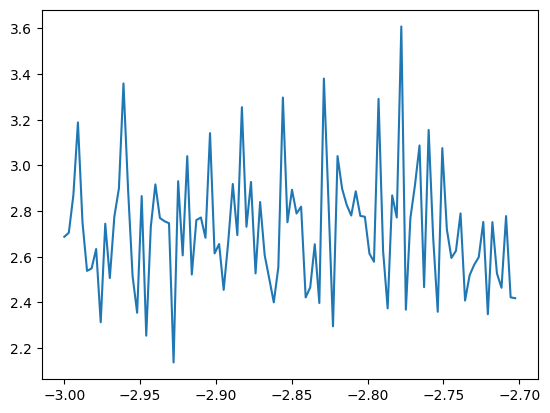

In [97]:
plt.plot(lri,lossi)